Enter the coordinate limit (e.g., 200):  200
Enter the number of computers (e.g., 10):  8
Enter the number of nodes (e.g., 500):  80


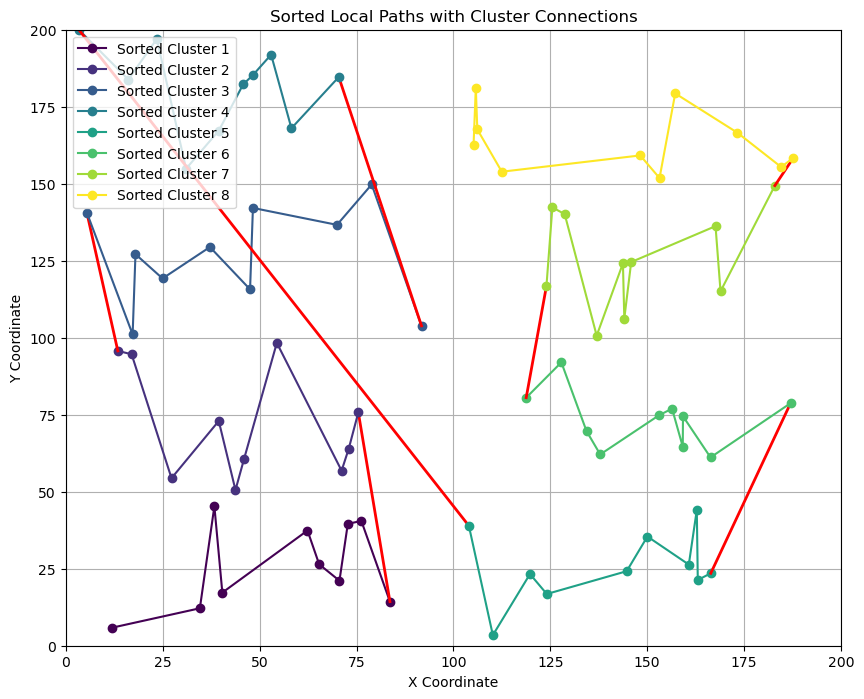

Optimal path for the general TSP:
[[ 39.45899783 167.22332831]
 [ 45.74537465 182.26263524]
 [ 58.20088166 168.00463041]
 [ 78.91473769 149.76462995]
 [ 69.9551222  136.64650147]
 [ 48.26395442 142.13774188]
 [ 47.52689429 115.69883715]
 [ 54.43090687  98.3163127 ]
 [ 37.16513147 129.44126762]
 [ 17.95258746 127.12341679]
 [  5.39801594 140.64906838]
 [ 24.94221949 119.23678473]
 [ 17.22097079 101.07456046]
 [ 13.40210679  95.72133911]
 [ 16.95809322  94.63256756]
 [ 39.4467027   72.96466746]
 [ 45.96478736  60.58682938]
 [ 43.76006232  50.55526243]
 [ 27.25494839  54.39742613]
 [ 38.31601182  45.28632529]
 [ 11.89369628   5.84793189]
 [ 34.57018515  12.15934611]
 [ 40.37067104  17.24570077]
 [ 83.62222603  14.31335212]
 [ 70.59396635  21.10826524]
 [ 65.3605079   26.43139238]
 [ 62.34426431  37.40859831]
 [ 72.75177962  39.5757316 ]
 [ 76.24707029  40.51353846]
 [ 71.14763632  56.82715487]
 [ 72.99030992  63.96508637]
 [ 75.4613313   75.74640851]
 [103.98884783  38.94667519]
 [119.761

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from python_tsp.heuristics import solve_tsp_simulated_annealing
from scipy.spatial.distance import pdist, squareform
from itertools import chain

# Get user inputs for the coordinate limit, number of computers, and number of nodes
coordinate = int(input("Enter the coordinate limit (e.g., 200): "))
computers = int(input("Enter the number of computers (e.g., 10): "))
nodes = int(input("Enter the number of nodes (e.g., 500): "))

# Function to generate random node coordinates within specified limits
def generate_nodes():
    full_coordinates = np.empty((0, 2), float)  # Create an empty array to hold coordinates, with 0 rows and 2 columns

    # Define sections to split the coordinate space based on the number of computers
    x_section_arr = np.linspace(0, coordinate, 3)  # Create 3 evenly spaced sections along the x-axis 
    y_section_arr = np.linspace(0, coordinate, num=int(3 + ceil((computers - 4) / 2)))  # Create y-sections

    nodes_per_computer = int(nodes / computers)  # Calculate the number of nodes per computer

    if computers % 2 == 0:  # Check if the number of computers is even
        # Loop through each x-section
        for x_section in range(len(x_section_arr) - 1):
            if computers == 2:  # If there are only 2 computers
                # Generate nodes uniformly across the defined sections
                x_nodes_coordinates = np.random.uniform(
                    int(x_section_arr[x_section]),  # Lower limit of x-section
                    int(x_section_arr[x_section + 1]),  # Upper limit of x-section
                    size=(nodes_per_computer, 1)  # Generate nodes for each computer
                )
                y_nodes_coordinates = np.random.uniform(0, coordinate, size=(nodes_per_computer, 1))  # Random y-coordinates
                col = np.column_stack((x_nodes_coordinates, y_nodes_coordinates))  # Stack x and y coordinates
                full_coordinates = np.append(full_coordinates, col, axis=0)  # Append new coordinates
            else:  # If there are more than 2 computers
                for y_section in range(len(y_section_arr) - 1):  # Loop through each y-section
                    x_nodes_coordinates = np.random.uniform(
                        int(x_section_arr[x_section]),  # Lower limit of x-section
                        int(x_section_arr[x_section + 1]),  # Upper limit of x-section
                        size=(nodes_per_computer, 1)  # Generate nodes for each computer
                    )
                    y_nodes_coordinates = np.random.uniform(
                        int(y_section_arr[y_section]),  # Lower limit of y-section
                        int(y_section_arr[y_section + 1]),  # Upper limit of y-section
                        size=(nodes_per_computer, 1)  # Random y-coordinates
                    )
                    col = np.column_stack((x_nodes_coordinates, y_nodes_coordinates))  # Stack combined coordinates
                    full_coordinates = np.append(full_coordinates, col, axis=0)  # Append combined coordinates

    else:  # If the number of computers is odd
        for x_section in range(len(x_section_arr) - 1):  # Loop through each x-section
            for y_section in range(len(y_section_arr) - 2):  # Loop through y-sections
                x_nodes_coordinates = np.random.uniform(
                    int(x_section_arr[x_section]),  # Lower limit of x-section
                    int(x_section_arr[x_section + 1]),  # Upper limit of x-section
                    size=(nodes_per_computer, 1)  # Generate nodes for each computer
                )
                y_nodes_coordinates = np.random.uniform(
                    int(y_section_arr[y_section]),  # Lower limit of y-section
                    int(y_section_arr[y_section + 1]),  # Upper limit of y-section
                    size=(nodes_per_computer, 1)  # Random y-coordinates
                )
                col = np.column_stack((x_nodes_coordinates, y_nodes_coordinates))  # Stack coordinates
                full_coordinates = np.append(full_coordinates, col, axis=0)  # Append to the full coordinates list

        # Generate nodes for the remaining section if the number of computers is odd
        x_nodes_coordinates = np.random.uniform(0, coordinate, size=(nodes_per_computer, 1))  # Random x-coordinates across full range
        y_nodes_coordinates = np.random.uniform(
            int(y_section_arr[len(y_section_arr) - 2]),
            int(y_section_arr[len(y_section_arr) - 1]),
            size=(nodes_per_computer, 1)  # Random y-coordinates for last section
        )
        col = np.column_stack((x_nodes_coordinates, y_nodes_coordinates))  # Stack coordinates of the last section
        full_coordinates = np.append(full_coordinates, col, axis=0)  # Append final coordinates

    return full_coordinates  # Return all generated coordinates

# Function to calculate the distance matrix
def calcute_distance(arr):
    return squareform(pdist(arr, metric='euclidean'))

# Function for optimizing the individual paths using TSP
def optimize_local_paths(full_coordinates):
    local_paths = []
    for coords in full_coordinates:
        distance_matrix = calcute_distance(coords)
        permutation, _ = solve_tsp_simulated_annealing(distance_matrix)
        local_paths.append(coords[permutation])
    return local_paths

# Function to sort the nodes within each cluster and connect the highest node of one to the lowest node of the next
def sort_and_connect_clusters(local_paths):
    all_connections = []
    sorted_local_paths = []

    # Sort each cluster of nodes by x and y coordinates
    for path in local_paths:
        sorted_path = path[np.lexsort((path[:, 1], path[:, 0]))]  # Sorting by x first, then by y
        sorted_local_paths.append(sorted_path)

    # Set to keep track of connected nodes
    connected_nodes = set()

    # Connect nodes based on minimum distance
    for i in range(len(sorted_local_paths) - 1):
        current_cluster = sorted_local_paths[i]
        next_cluster = sorted_local_paths[i + 1]

        first_current = current_cluster[0]  # First node of the current cluster
        last_current = current_cluster[-1]    # Last node of the current cluster

        first_next = next_cluster[0]          # First node of the next cluster
        last_next = next_cluster[-1]           # Last node of the next cluster

        # List of potential connections with their distances
        potential_connections = []

        # Check distances while avoiding already connected nodes
        if tuple(first_current) not in connected_nodes and tuple(first_next) not in connected_nodes:
            distance = np.sqrt((first_current[0] - first_next[0])**2 + (first_current[1] - first_next[1])**2)
            potential_connections.append((first_current, first_next, distance))

        if tuple(first_current) not in connected_nodes and tuple(last_next) not in connected_nodes:
            distance = np.sqrt((first_current[0] - last_next[0])**2 + (first_current[1] - last_next[1])**2)
            potential_connections.append((first_current, last_next, distance))

        if tuple(last_current) not in connected_nodes and tuple(first_next) not in connected_nodes:
            distance = np.sqrt((last_current[0] - first_next[0])**2 + (last_current[1] - first_next[1])**2)
            potential_connections.append((last_current, first_next, distance))

        if tuple(last_current) not in connected_nodes and tuple(last_next) not in connected_nodes:
            distance = np.sqrt((last_current[0] - last_next[0])**2 + (last_current[1] - last_next[1])**2)
            potential_connections.append((last_current, last_next, distance))

        # Find the connection with the minimum distance
        if potential_connections:
            closest_connection = min(potential_connections, key=lambda x: x[2])
            # Add the best connection to the all_connections list
            all_connections.append((closest_connection[0], closest_connection[1]))

            # Mark the connected nodes as connected
            connected_nodes.add(tuple(closest_connection[0]))
            connected_nodes.add(tuple(closest_connection[1]))

    return sorted_local_paths, all_connections
    
# Function to plot paths with connections between clusters
def plot_paths_with_connections(sorted_local_paths, connections):
    plt.figure(figsize=(10, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_local_paths)))

    # Plot sorted local paths and connections between clusters
    for i, path in enumerate(sorted_local_paths):
        plt.plot(path[:, 0], path[:, 1], marker='o', color=colors[i], label=f'Sorted Cluster {i + 1}')
        # Plot the connections between clusters
        if i < len(connections):
            conn = connections[i]
            plt.plot([conn[0][0], conn[1][0]], [conn[0][1], conn[1][1]], color='red', linestyle='-', linewidth=2)

    plt.scatter(all_coordinates[:, 0], all_coordinates[:, 1], color='black', s=10)
    plt.title('Sorted Local Paths with Cluster Connections')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend(loc='upper left')
    plt.xlim(0, coordinate)
    plt.ylim(0, coordinate)
    plt.grid(True)
    plt.show()

# Function to create a general TSP from sorted paths and connections
def create_general_tsp(sorted_local_paths, connections):
    # Extract all unique points from sorted paths and add the connection points
    all_points = {tuple(point) for path in sorted_local_paths for point in path}
    for conn in connections:
        all_points.add(tuple(conn[0]))  # Add start of the connection
        all_points.add(tuple(conn[1]))  # Add end of the connection

    # Convert the set back to a numpy array
    all_points = np.array(list(all_points))

    # Calculate the distance matrix for the general TSP
    distance_matrix = calcute_distance(all_points)

    return distance_matrix, all_points

# Main execution block
if __name__ == '__main__':
    all_coordinates = generate_nodes()
    full_coordinates = np.array_split(all_coordinates, computers)

    # Optimize local paths for each computer
    local_paths = optimize_local_paths(full_coordinates)

    # Sort clusters and connect the highest node of each cluster to the lowest node of the next
    sorted_local_paths, connections = sort_and_connect_clusters(local_paths)

    # Plot all sorted local paths with cluster connections
    plot_paths_with_connections(sorted_local_paths, connections)

    # Create the general TSP from sorted local paths and connections
    distance_matrix, all_points = create_general_tsp(sorted_local_paths, connections)

    # Solve the general TSP
    permutation, _ = solve_tsp_simulated_annealing(distance_matrix)

    # Rearranging the all_points based on the permutation
    optimal_path = all_points[permutation]

    # Print the optimal path for the general TSP
    print("Optimal path for the general TSP:")
    print(optimal_path)


Enter the coordinate limit (e.g., 200):  200
Enter the number of computers (e.g., 10):  4
Enter the number of nodes (e.g., 500):  100


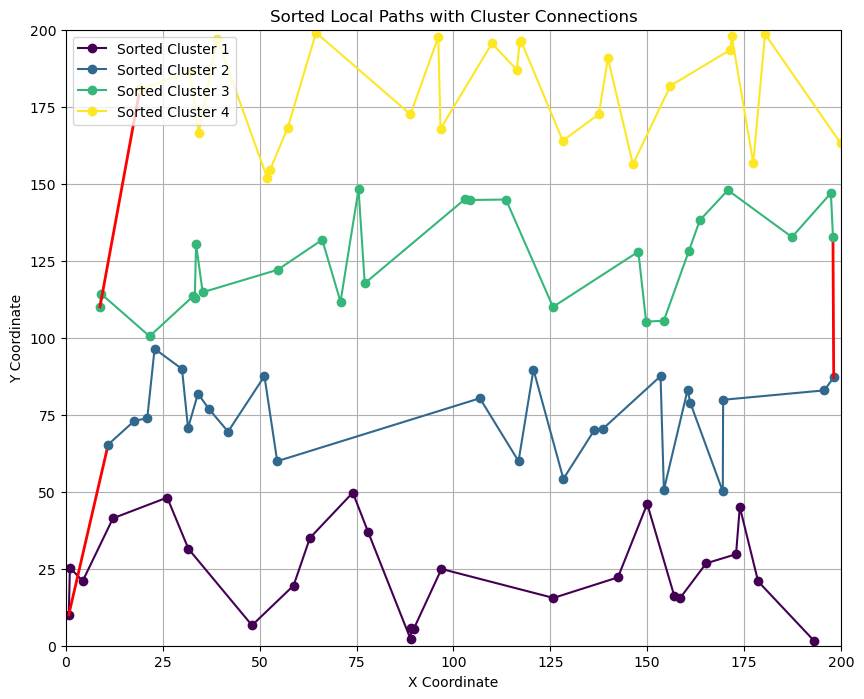

Optimal path for the general TSP:
[[198.14193389  87.14409142]
 [195.73394057  82.9096878 ]
 [160.43107622  83.02876386]
 [153.45269089  87.51968783]
 [154.29647212 105.49163065]
 [149.72934922 105.24380097]
 [147.7261282  127.9415734 ]
 [160.77410982 128.19793544]
 [163.592116   138.1389135 ]
 [170.82815917 147.90841299]
 [177.38073316 156.71482926]
 [187.3701729  132.67967933]
 [197.95132991 132.74116079]
 [197.4149301  146.95249906]
 [199.90766125 163.17199032]
 [180.42982606 198.57448722]
 [171.82054863 198.0094497 ]
 [171.48659256 193.49524189]
 [155.98997653 181.79434337]
 [139.8730949  190.72908448]
 [116.34118573 186.98782033]
 [117.4889396  196.2336993 ]
 [117.11823455 195.97249736]
 [109.94081664 195.56971144]
 [ 96.09909142 197.62967326]
 [ 64.54476387 199.04666352]
 [ 39.02481271 197.12241576]
 [ 32.01250371 186.36234118]
 [ 19.08981178 180.64035873]
 [ 34.26014822 166.44109678]
 [ 57.26685246 168.2396511 ]
 [ 52.61014466 154.30947888]
 [ 51.93315428 151.9164539 ]
 [ 66.151

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from python_tsp.heuristics import solve_tsp_simulated_annealing
from scipy.spatial.distance import pdist, squareform

# Get user inputs for the coordinate limit, number of computers, and number of nodes
coordinate = int(input("Enter the coordinate limit (e.g., 200): "))
computers = int(input("Enter the number of computers (e.g., 10): "))
nodes = int(input("Enter the number of nodes (e.g., 500): "))

# Function to generate random node coordinates within specified limits
def generate_nodes():
    full_coordinates = np.empty((0, 2), float)
    
    # Define sections to split the coordinate space based on the number of clusters
    x_section_arr = np.linspace(0, coordinate, 3)  # x range remains the same
    y_section_height = coordinate / computers  # Set equal clusters vertically

    nodes_per_computer = int(nodes / computers)

    for i in range(computers):
        # Calculate y-coordinate section based on computer index
        y_lower = i * y_section_height
        y_upper = (i + 1) * y_section_height

        # Generate nodes uniformly in x and the defined y section
        x_nodes_coordinates = np.random.uniform(0, coordinate, size=(nodes_per_computer, 1))
        y_nodes_coordinates = np.random.uniform(y_lower, y_upper, size=(nodes_per_computer, 1))

        col = np.column_stack((x_nodes_coordinates, y_nodes_coordinates))
        full_coordinates = np.append(full_coordinates, col, axis=0)

    return full_coordinates

# Function to calculate the distance matrix
def calcute_distance(arr):
    return squareform(pdist(arr, metric='euclidean'))

# Function for optimizing the individual paths using TSP
def optimize_local_paths(full_coordinates):
    local_paths = []
    for coords in full_coordinates:
        distance_matrix = calcute_distance(coords)
        permutation, _ = solve_tsp_simulated_annealing(distance_matrix)
        local_paths.append(coords[permutation])
    return local_paths

# Function to sort the nodes within each cluster and connect the first unconnected of one to the last unconnected of another
def sort_and_connect_clusters(local_paths):
    all_connections = []
    sorted_local_paths = []

    # Sort each cluster of nodes by x and y coordinates
    for path in local_paths:
        sorted_path = path[np.lexsort((path[:, 1], path[:, 0]))]  # Sorting by x first, then by y
        sorted_local_paths.append(sorted_path)

    # Set to keep track of connected nodes
    connected_nodes = set()

    # Connect nodes based on minimum distance
    for i in range(len(sorted_local_paths) - 1):
        current_cluster = sorted_local_paths[i]
        next_cluster = sorted_local_paths[i + 1]

        first_current = current_cluster[0]  # First node of the current cluster
        last_current = current_cluster[-1]    # Last node of the current cluster

        first_next = next_cluster[0]          # First node of the next cluster
        last_next = next_cluster[-1]           # Last node of the next cluster

        # List of potential connections with their distances
        potential_connections = []

        # Check distances while avoiding already connected nodes
        if tuple(first_current) not in connected_nodes and tuple(first_next) not in connected_nodes:
            distance = np.sqrt((first_current[0] - first_next[0])**2 + (first_current[1] - first_next[1])**2)
            potential_connections.append((first_current, first_next, distance))

        if tuple(first_current) not in connected_nodes and tuple(last_next) not in connected_nodes:
            distance = np.sqrt((first_current[0] - last_next[0])**2 + (first_current[1] - last_next[1])**2)
            potential_connections.append((first_current, last_next, distance))

        if tuple(last_current) not in connected_nodes and tuple(first_next) not in connected_nodes:
            distance = np.sqrt((last_current[0] - first_next[0])**2 + (last_current[1] - first_next[1])**2)
            potential_connections.append((last_current, first_next, distance))

        if tuple(last_current) not in connected_nodes and tuple(last_next) not in connected_nodes:
            distance = np.sqrt((last_current[0] - last_next[0])**2 + (last_current[1] - last_next[1])**2)
            potential_connections.append((last_current, last_next, distance))

        # Find the connection with the minimum distance
        if potential_connections:
            closest_connection = min(potential_connections, key=lambda x: x[2])
            # Add the best connection to the all_connections list
            all_connections.append((closest_connection[0], closest_connection[1]))

            # Mark the connected nodes as connected
            connected_nodes.add(tuple(closest_connection[0]))
            connected_nodes.add(tuple(closest_connection[1]))

    # Connecting the first unconnected node of the first cluster to the last unconnected node of the last cluster
    first_cluster_first_node = sorted_local_paths[0][0]  # First node of the first cluster
    last_cluster_last_node = sorted_local_paths[-1][-1]   # Last node of the last cluster

    # Check if they are the first unconnected nodes
    if tuple(first_cluster_first_node) not in connected_nodes and tuple(last_cluster_last_node) not in connected_nodes:
        all_connections.append((first_cluster_first_node, last_cluster_last_node))

    return sorted_local_paths, all_connections
    
# Function to plot paths with connections between clusters
def plot_paths_with_connections(sorted_local_paths, connections):
    plt.figure(figsize=(10, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_local_paths)))

    # Plot sorted local paths and connections between clusters
    for i, path in enumerate(sorted_local_paths):
        plt.plot(path[:, 0], path[:, 1], marker='o', color=colors[i], label=f'Sorted Cluster {i + 1}')
        # Plot the connections between clusters
        if i < len(connections):
            conn = connections[i]
            plt.plot([conn[0][0], conn[1][0]], [conn[0][1], conn[1][1]], color='red', linestyle='-', linewidth=2)

    plt.scatter(all_coordinates[:, 0], all_coordinates[:, 1], color='black', s=10)
    plt.title('Sorted Local Paths with Cluster Connections')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend(loc='upper left')
    plt.xlim(0, coordinate)
    plt.ylim(0, coordinate)
    plt.grid(True)
    plt.show()

# Function to create a general TSP from sorted paths and connections
def create_general_tsp(sorted_local_paths, connections):
    # Extract all unique points from sorted paths and add the connection points
    all_points = {tuple(point) for path in sorted_local_paths for point in path}
    for conn in connections:
        all_points.add(tuple(conn[0]))  # Add start of the connection
        all_points.add(tuple(conn[1]))  # Add end of the connection

    # Convert the set back to a numpy array
    all_points = np.array(list(all_points))

    # Calculate the distance matrix for the general TSP
    distance_matrix = calcute_distance(all_points)

    return distance_matrix, all_points

# Main execution block
if __name__ == '__main__':
    all_coordinates = generate_nodes()
    full_coordinates = np.array_split(all_coordinates, computers)

    # Optimize local paths for each computer
    local_paths = optimize_local_paths(full_coordinates)

    # Sort clusters and connect the first unconnected node of the first cluster to the last unconnected node of the last cluster
    sorted_local_paths, connections = sort_and_connect_clusters(local_paths)

    # Plot all sorted local paths with cluster connections
    plot_paths_with_connections(sorted_local_paths, connections)

    # Create the general TSP from sorted local paths and connections
    distance_matrix, all_points = create_general_tsp(sorted_local_paths, connections)

    # Solve the general TSP
    permutation, _ = solve_tsp_simulated_annealing(distance_matrix)

    # Rearranging the all_points based on the permutation
    optimal_path = all_points[permutation]

    # Print the optimal path for the general TSP
    print("Optimal path for the general TSP:")
    print(optimal_path)